# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Data Preprocessing

### Training Image preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[159.   149.   158.  ]
   [148.5  138.5  147.5 ]
   [149.5  139.5  148.5 ]
   ...
   [150.75 140.75 149.75]
   [148.5  138.5  147.5 ]
   [149.   139.   148.  ]]

  [[153.5  143.5  152.5 ]
   [154.75 144.75 153.75]
   [149.75 139.75 148.75]
   ...
   [158.25 148.25 157.25]
   [157.   147.   156.  ]
   [154.5  144.5  153.5 ]]

  [[156.75 146.75 155.75]
   [155.   145.   154.  ]
   [146.5  136.5  145.5 ]
   ...
   [152.   142.   151.  ]
   [147.5  137.5  146.5 ]
   [153.   143.   152.  ]]

  ...

  [[113.5  100.5  107.5 ]
   [107.25  94.25 101.25]
   [115.75 102.75 109.75]
   ...
   [129.75 118.75 126.75]
   [112.   101.   109.  ]
   [115.75 104.75 112.75]]

  [[118.   105.   112.  ]
   [111.75  98.75 105.75]
   [116.25 103.25 110.25]
   ...
   [118.25 107.25 115.25]
   [115.5  104.5  112.5 ]
   [114.75 103.75 111.75]]

  [[109.5   96.5  103.5 ]
   [104.25  91.25  98.25]
   [111.    98.   105.  ]
   ...
   [115.5  104.5  112.5 ]
   [118.75 107.75 115.75]
   [148.5  137.5  14

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [10]:
import tensorflow as tf
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [20]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [26]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 4814s 2s/step - loss: 29.5121 - accuracy: 0.0272 - val_loss: 3.6387 - val_accuracy: 0.0286
Epoch 2/10
2197/2197 [==============================] - 3704s 2s/step - loss: 3.6483 - accuracy: 0.0272 - val_loss: 3.6387 - val_accuracy: 0.0286
Epoch 3/10
2197/2197 [==============================] - 3971s 2s/step - loss: 3.6486 - accuracy: 0.0272 - val_loss: 3.6388 - val_accuracy: 0.0286
Epoch 4/10
2197/2197 [==============================] - 3719s 2s/step - loss: 3.6388 - accuracy: 0.0276 - val_loss: 3.6390 - val_accuracy: 0.0286
Epoch 5/10
2197/2197 [==============================] - 2396s 1s/step - loss: 3.6388 - accuracy: 0.0268 - val_loss: 3.6389 - val_accuracy: 0.0286
Epoch 6/10
2197/2197 [==============================] - 2377s 1s/step - loss: 3.6388 - accuracy: 0.0269 - val_loss: 3.6388 - val_accuracy: 0.0286
Epoch 7/10
2197/2197 [==============================] - 2377s 1s/step - loss: 3.6389 - accuracy: 0.0270 - val_loss: 3.6387 - val_accur

## Evaluating Model

In [28]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 585s 266ms/step - loss: 3.6390 - accuracy: 0.0286
Training accuracy: 0.02859378419816494


In [29]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 132s 239ms/step - loss: 3.6389 - accuracy: 0.0286
Validation accuracy: 0.028625085949897766


### Saving Model

In [30]:
cnn.save('trained_plant_disease_model.keras')

In [31]:
training_history.history                         #Return Dictionary of history

{'loss': [29.512075424194336,
  3.6482534408569336,
  3.6486446857452393,
  3.638824224472046,
  3.6388044357299805,
  3.6388463973999023,
  3.6389386653900146,
  3.6388704776763916,
  3.638871669769287,
  3.6388542652130127],
 'accuracy': [0.02724233642220497,
  0.027228109538555145,
  0.027185432612895966,
  0.027640657499432564,
  0.026772886514663696,
  0.02691514417529106,
  0.026986273005604744,
  0.027441496029496193,
  0.027484172955155373,
  0.0274983998388052],
 'val_loss': [3.638699769973755,
  3.638742685317993,
  3.638810157775879,
  3.6389904022216797,
  3.6388869285583496,
  3.6387813091278076,
  3.638685941696167,
  3.638794422149658,
  3.638913631439209,
  3.6389496326446533],
 'val_accuracy': [0.028625085949897766,
  0.028625085949897766,
  0.028625085949897766,
  0.028625085949897766,
  0.028625085949897766,
  0.028625085949897766,
  0.028625085949897766,
  0.028625085949897766,
  0.028625085949897766,
  0.028625085949897766]}

In [32]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [33]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

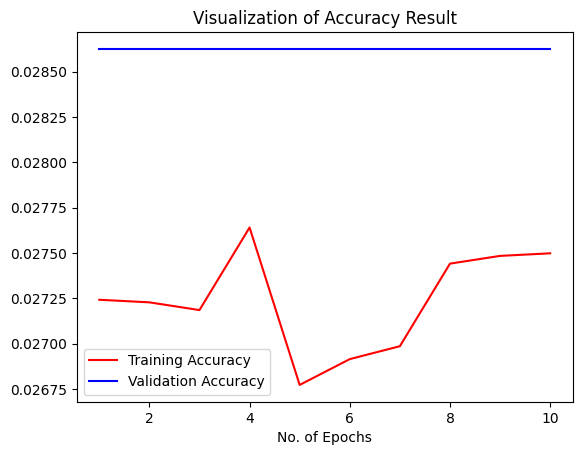

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [36]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 405s 23ms/step


In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [40]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([15, 15, 15, ..., 15, 15, 15], dtype=int64)>

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [43]:
cm.shape

(38, 38)

In [44]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       504
                                 Apple___Black_rot       0.00      0.00      0.00       497
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       440
                                   Apple___healthy       0.00      0.00      0.00       502
                               Blueberry___healthy       0.00      0.00      0.00       454
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       421
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       410
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

c:\Users\HP\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix Visualization

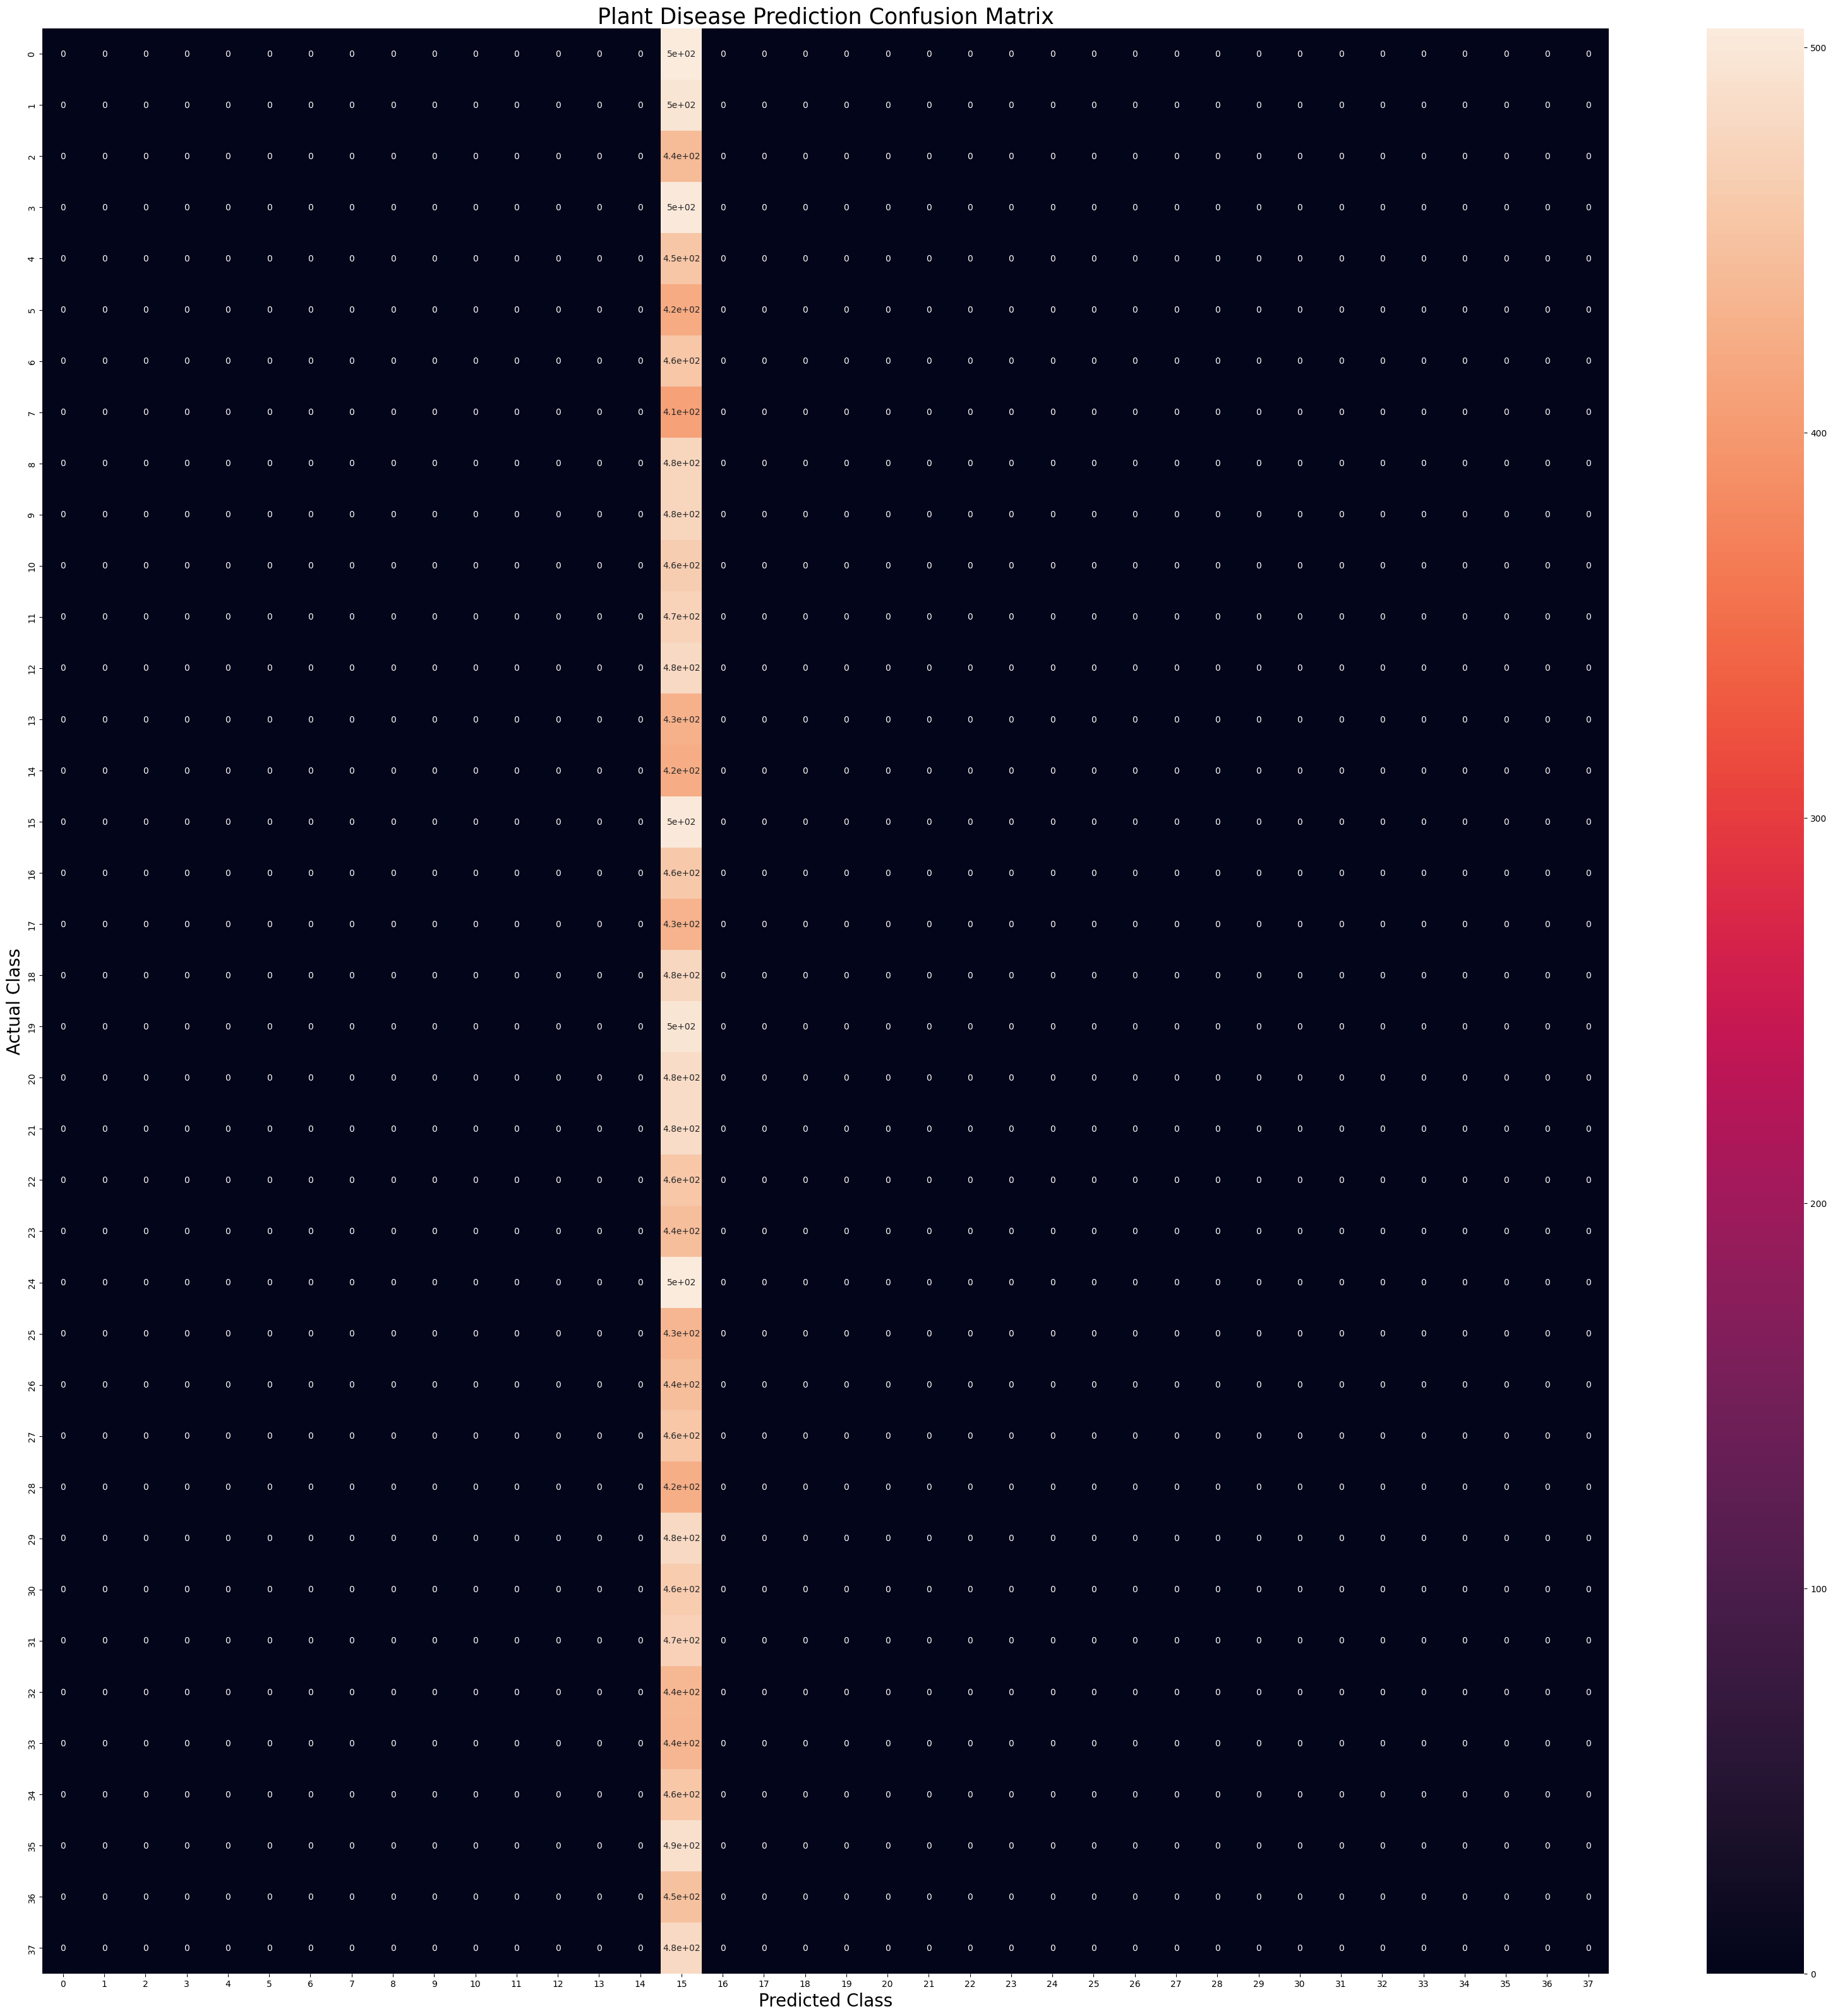

In [45]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()